In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
import statsmodels.api as sm
from plotly.tools import mpl_to_plotly
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf

In [34]:
df = pd.read_csv("Instagram-Reach.csv", encoding = 'latin-1')
print(df.head())

                  Date  Instagram reach
0  2022-04-01T00:00:00             7620
1  2022-04-02T00:00:00            12859
2  2022-04-03T00:00:00            16008
3  2022-04-04T00:00:00            24349
4  2022-04-05T00:00:00            20532


In [35]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.head())

        Date  Instagram reach
0 2022-04-01             7620
1 2022-04-02            12859
2 2022-04-03            16008
3 2022-04-04            24349
4 2022-04-05            20532


In [47]:
df.shape

(365, 3)

In [48]:
df.isna().sum()

Date               0
Instagram reach    0
Day                0
dtype: int64

In [36]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], 
                         y=df['Instagram reach'], 
                         mode='lines', name='Instagram reach'))
fig.update_layout(title='Instagram Reach Trend', xaxis_title='Date', 
                  yaxis_title='Instagram Reach')
fig.show()

In [37]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df['Date'], 
                     y=df['Instagram reach'], 
                     name='Instagram reach'))
fig.update_layout(title='Instagram Reach by Day', 
                  xaxis_title='Date', 
                  yaxis_title='Instagram Reach')
fig.show()

In [38]:
fig = go.Figure()
fig.add_trace(go.Box(y=df['Instagram reach'], 
                     name='Instagram reach'))
fig.update_layout(title='Instagram Reach Box Plot', 
                  yaxis_title='Instagram Reach')
fig.show()

In [39]:
df['Day'] = df['Date'].dt.day_name()
print(df.head())

        Date  Instagram reach       Day
0 2022-04-01             7620    Friday
1 2022-04-02            12859  Saturday
2 2022-04-03            16008    Sunday
3 2022-04-04            24349    Monday
4 2022-04-05            20532   Tuesday


In [40]:
day_stats = df.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reset_index()
print(day_stats)

         Day          mean   median           std
0     Friday  46666.849057  35574.0  29856.943036
1     Monday  52621.692308  46853.0  32296.071347
2   Saturday  47374.750000  40012.0  27667.043634
3     Sunday  53114.173077  47797.0  30906.162384
4   Thursday  48570.923077  39150.0  28623.220625
5    Tuesday  54030.557692  48786.0  32503.726482
6  Wednesday  51017.269231  42320.5  29047.869685


In [41]:
fig = go.Figure()
fig.add_trace(go.Bar(x=day_stats['Day'], 
                     y=day_stats['mean'], 
                     name='Mean'))
fig.add_trace(go.Bar(x=day_stats['Day'], 
                     y=day_stats['median'], 
                     name='Median'))
fig.add_trace(go.Bar(x=day_stats['Day'], 
                     y=day_stats['std'], 
                     name='Standard Deviation'))
fig.update_layout(title='Instagram Reach by Day of the Week', 
                  xaxis_title='Day', 
                  yaxis_title='Instagram Reach')
fig.show()

In [42]:
data = df[["Date", "Instagram reach"]]

result = seasonal_decompose(df['Instagram reach'], 
                            model='multiplicative', 
                            period=100)

fig = plt.figure()
fig = result.plot()

fig = mpl_to_plotly(fig)
fig.show()

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

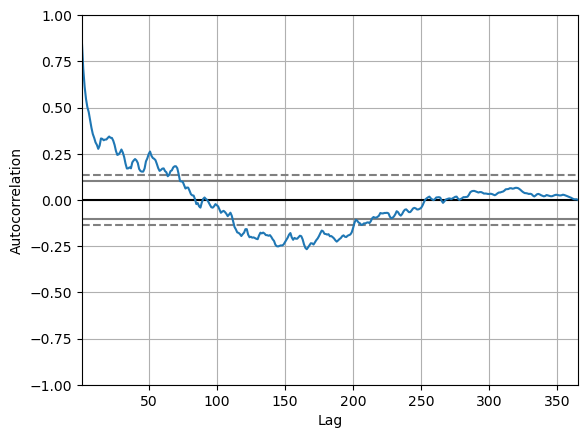

In [43]:
pd.plotting.autocorrelation_plot(data["Instagram reach"])

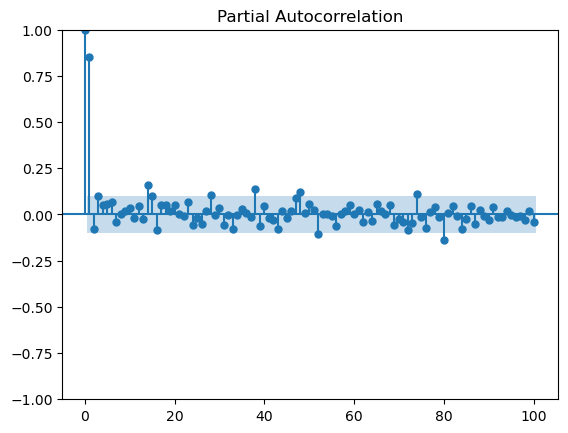

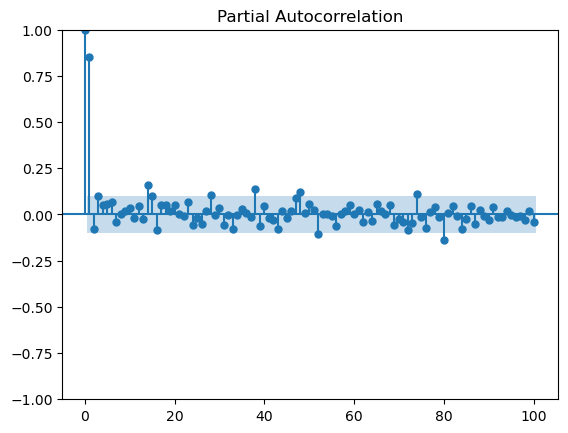

In [44]:
plot_pacf(data["Instagram reach"], lags = 100)


In [45]:
p, d, q = 8, 1, 2

model=sm.tsa.statespace.SARIMAX(data['Instagram reach'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                    Instagram reach   No. Observations:                  365
Model:             SARIMAX(8, 1, 2)x(8, 1, 2, 12)   Log Likelihood               -3938.512
Date:                            Sat, 14 Feb 2026   AIC                           7919.024
Time:                                    23:09:33   BIC                           8000.160
Sample:                                         0   HQIC                          7951.312
                                            - 365                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1897      6.711      0.028      0.977     -12.964      13.343
ar.L2          0.4754      6.245   

In [46]:
predictions = model.predict(len(data), len(data)+100)

trace_train = go.Scatter(x=data.index, 
                         y=data["Instagram reach"], 
                         mode="lines", 
                         name="Training Data")
trace_pred = go.Scatter(x=predictions.index, 
                        y=predictions, 
                        mode="lines", 
                        name="Predictions")

layout = go.Layout(title="Instagram Reach Time Series and Predictions", 
                   xaxis_title="Date", 
                   yaxis_title="Instagram Reach")

fig = go.Figure(data=[trace_train, trace_pred], layout=layout)
fig.show()